## National Institute for Space Research
   <img src="img/icone_cap394.svg" align="right" alt="Drawing" style="width: 200px;"/>
   
#### Project for course  Introduction to Data Science - CAP 394
#### Student: 
* Helvecio Bezerra Leal Neto

#### Instructors: 
* Dr. Gilberto Queiroz 
* Dr. Rafael Santos

## Schedule
     - [x] Data reading
     - [x] Data visualization
     - [ ] Cluster detection algorithm
     - [ ] Preprocessing
     - [ ] Radiosonde data correlation
     - [ ] Final analysis and project elaboration
     

### Index

  [About](#about) <br></br>
  [The Data](#the_data)<br></br>
  [Reading Data](#reading_data)<br></br>
  
  <blockquote>
  <p>
    Esse é um bloco de citação.
    Ele pode ter várias linhas.
  </p>
  <p>Inclusive, uma quebra de linha.</p>
</blockquote>
  

<a id='about'></a>
## About

<a id='the_data'></a>
## The Data

The data analyzed in this example consists of NC (NetCDF4) files. Each file corresponds to Rain Rate measurements collected by the Amazon Protection System (SIPAM) radar during the GoAmazon experiment periods, starting from January 2014 to December 2015, such files contain data on 12-minute time intervals.

https://www.arm.gov/research/campaigns/amf2014goamazon

<a id='reading_data'></a>
## Reading Data

#### 1.1 - Libraries used

In [3]:
import numpy as np
import xarray as xr
import warnings
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors


warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.2 - Data Reading

In [5]:
## NC Files from SIPAM RADAR
xds = xr.open_dataset('data/radar/20140201/')
## Radiosonde files
df = pd.read_csv('data/t3/RG1_T3_rr_byHour.txt', sep="\s+", header=None,names=['year','month','day','hour','null','null2','value'])

FileNotFoundError: [Errno 2] No such file or directory: b'/ssd/CAP-394/data/radar/sbmn_rain_rates_20140113_080007.nc'

### Variáveis presentes no conjunto de dados

In [144]:
xds.data_vars

Data variables:
    start_time  datetime64[ns] ...
    stop_time   datetime64[ns] ...
    lat0        (y0, x0) float32 ...
    lon0        (y0, x0) float32 ...
    rain_rate   (y0, x0) float32 ...

In [145]:
rr = xds.rain_rate                  ### Matriz com valores de preciptacao
runit = xds.rain_rate.units         ### Unidade mm/h
rkm = xds.rain_rate.height_km       ### Unidade de altitude km
start_time = xds.start_time.data    ### Tempo inical
stop_time = xds.stop_time.data      ### Tempo Final
lon = xds.lon0.data                 ### Matriz Longitude
lat = xds.lat0.data                 ### Matriz

In [1]:
rr['y0']

NameError: name 'rr' is not defined

In [7]:
# Radiosonde variables
df.head()

,year,month,day,hour,null,null2,value
0,2014.0,1.0,3.0,22.0,0.0,0.0,1.270
1,2014.0,1.0,4.0,15.0,0.0,0.0,0.254
2,2014.0,1.0,5.0,19.0,0.0,0.0,5.842
3,2014.0,1.0,5.0,20.0,0.0,0.0,3.048
4,2014.0,1.0,6.0,9.0,0.0,0.0,0.254


In [8]:
agreg = df.groupby(['month']).agg(['sum'])

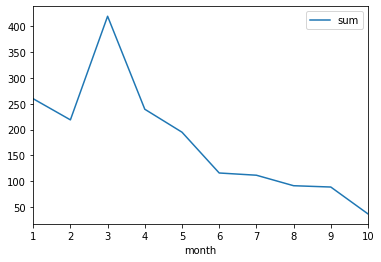

In [9]:
agreg['value'].plot()

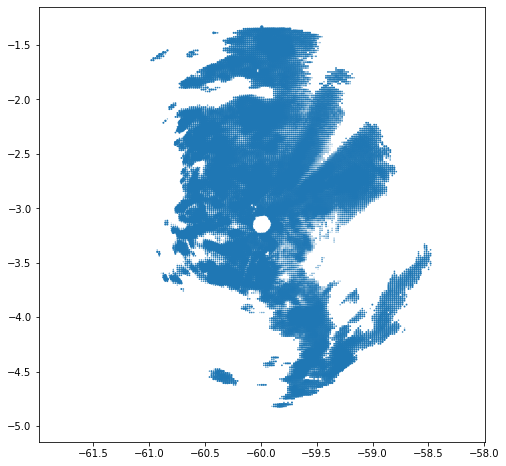

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(lon,lat,rr)
plt.savefig('image02')

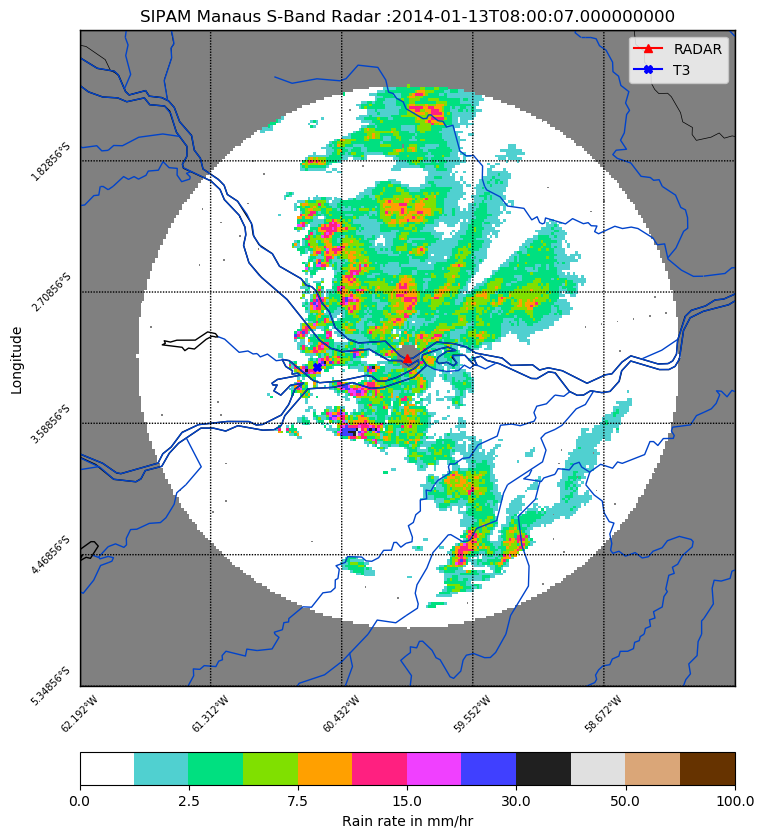

In [158]:
from lib.radar_plot import radar_plot
img = radar_plot(rr=rr,runit=runit,lat=lat,lon=lon,start_time=start_time,stop_time=stop_time)

In [19]:
t1 = './data/radar/'
t2 = './data/t3'
   
def createImages():
    for file in os.listdir(t1):
        xds = xr.open_dataset(t1+"/"+file)
        rr = xds.rain_rate
        lon = xds.lon0.data
        lat = xds.lat0.data
        cimages(file,rr,lat,lon)

In [42]:
def cimages(file,rr,lat,lon):
    my_coords = [-3.148556, -59.992000]     ## RADAR T1 SIPAM COORDS
    zoom_scale = 2.2                        ## ZOOM SCALE

    fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=100)

    clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
                 50, 70, 100]

    cmap_data = [(1.0, 1.0, 1.0),
                    (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                    (0.0, 1.0, 1.0),
                    (0.0, 0.8784313797950745, 0.501960813999176),
                    (0.0, 0.7529411911964417, 0.0),
                    (0.501960813999176, 0.8784313797950745, 0.0),
                    (1.0, 1.0, 0.0),
                    (1.0, 0.6274510025978088, 0.0),
                    (1.0, 0.0, 0.0),
                    (1.0, 0.125490203499794, 0.501960813999176),
                    (0.9411764740943909, 0.250980406999588, 1.0),
                    (0.501960813999176, 0.125490203499794, 1.0),
                    (0.250980406999588, 0.250980406999588, 1.0),
                    (0.125490203499794, 0.125490203499794, 0.501960813999176),
                    (0.125490203499794, 0.125490203499794, 0.125490203499794),
                    (0.501960813999176, 0.501960813999176, 0.501960813999176),
                    (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                    (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                    (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                    (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                    (0.4000000059604645, 0.20000000298023224, 0.0)]

    cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm = mcolors.BoundaryNorm(clevs, cmap.N)
    ax = axes


    bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
                my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

    m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
                    llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

    xi, yi = m(lon, lat)

    cs = m.pcolormesh(xi,yi,rr, cmap = cmap, vmin= 0, ax=ax)
    m.drawmapboundary(fill_color='gray')
    plt.savefig("radar_image/"+file+".png")

In [54]:
def animate():
    
    # Prepare canvas
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111,aspect="equal")
    im1 = ax.imshow(rr, origin="lower", cmap="gray", interpolation="none", vmin=10,  vmax=20)
    plt.xlabel("Easting (km)")
    plt.ylabel("Northing (km)")
    
    return (0)

0

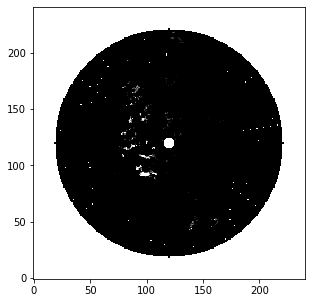

In [52]:
animate()

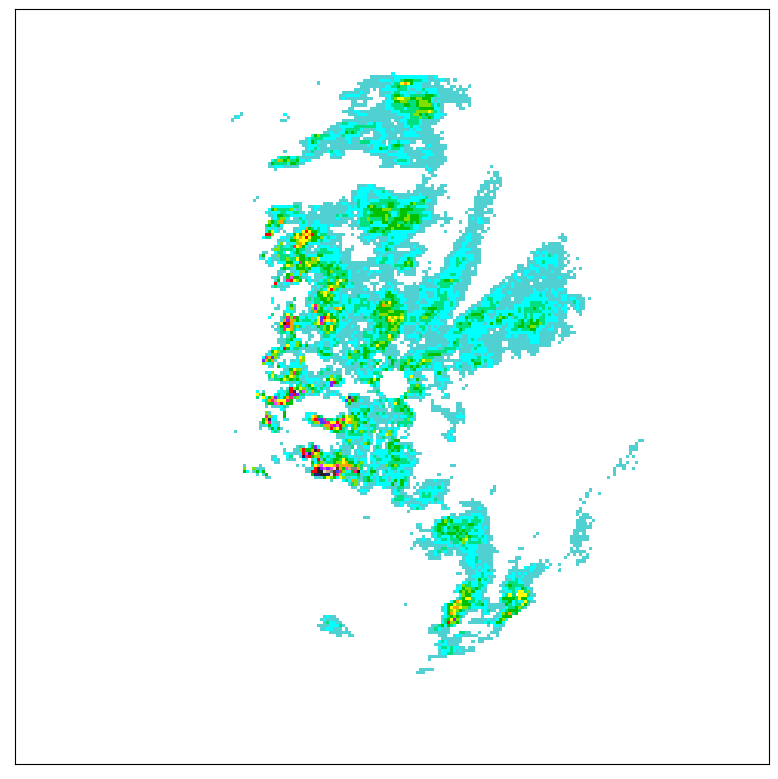

In [43]:
cimages('Teste',rr,lat,lon)

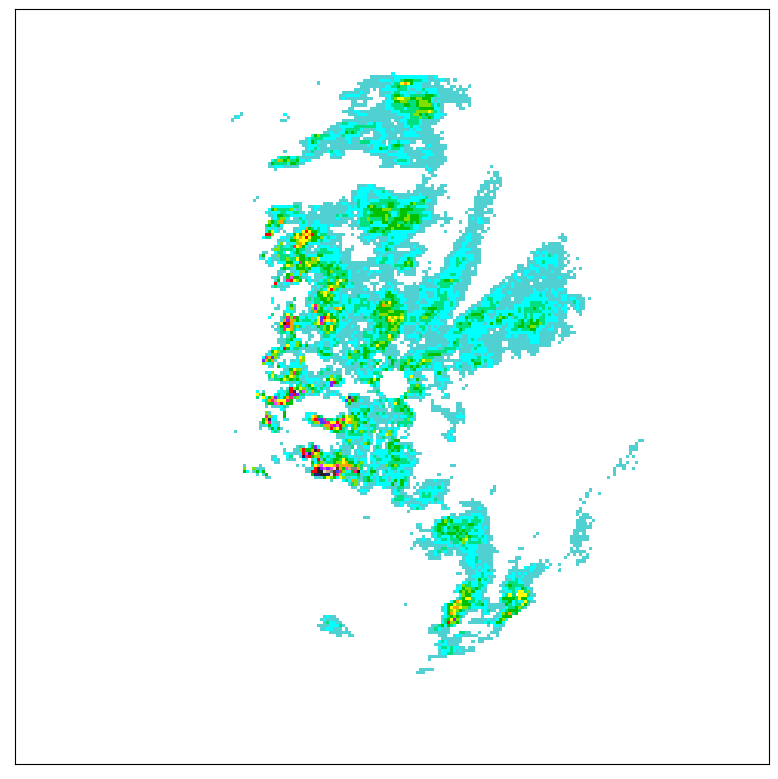

In [157]:
cimages('Teste',rr,lat,lon)

In [138]:
t1 = './data/radar/'
t2 = './data/t3'
   
def createImages():
    for file in os.listdir(t1):
        xds = xr.open_dataset(t1+"/"+file)
        rr = xds.rain_rate
        lon = xds.lon0.data
        lat = xds.lat0.data
        cimages(file,rr,lat,lon)

In [ ]:
rdata = np.nan_to_num(rr.data)

In [2]:
plt.scatter(lon,lat,rdata)

NameError: name 'plt' is not defined

In [13]:
def isInside(x, y):
    p1y, p1x = -3.263509, -60.683667 
    p2y, p2x = -3.257604, -60.528133
    p3y, p3x = -3.174176, -60.532595
    p4y, p4x = -3.174181, -60.676825
    
    if (x >= p1x and x <= p2x) and (y >= p1y and y <= p4y):
        return True
    else:
        pass
#         print('{}, {} nao esta em x1: {} x2: {} y1: {} y4: {}'.format(x, y, p1x, p2x, p1y, p4y))
    return False

In [ ]:
import math

def dist(p1,p2):
    
    distancia = math.sqrt(math.pow(abs(p1[0]-p2[0]),2)+math.pow(abs(p1[1]-p2[1]),2))
    
    return distancia
    

In [ ]:
locT3 = (-60.598371,-3.212929)
p1y = (-60.683667, -3.263509)

dist(locT3,p1y)

In [ ]:
median = []

for i in range(len(lat)):
    for j in range(len(lat)):
        if (isInside(lon[i][j], lat[i][j])):
            print(rdata[i][j])
             #print (rdata[i][j])
        else:
            pass
#np.std(np.array(median))

### References


In [ ]:
-3.212929

In [ ]:
(n>=-3.212729 and n<=-3.2121229) and ()